## Cars dataset can be found http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/index.html

* In this notebook only SV data is used which is car images captured in the front view
* The data itself can be found here https://drive.google.com/drive/folders/18EunmjOJsbE5Lh9zA0cZ4wKV6Um46dkg

## Get archives and unzip files

In [ ]:
# Create shortcut of shared CompCars folder and copy content inside to your GoogleDrive or local (to process afterwards)
! cp -r /content/drive/MyDrive/Colab\ Notebooks/Git/CompCars/. /content/drive/MyDrive/Colab\ Notebooks/Git/

# Combine all archive files into one combined archive
# ! zip -F /content/drive/MyDrive/Colab\ Notebooks/Git/data.zip --out /content/drive/MyDrive/Colab\ Notebooks/Git/combined.zip
! zip -F /content/drive/MyDrive/Colab\ Notebooks/Git/sv_data.zip --out /content/drive/MyDrive/Colab\ Notebooks/Git/sv_combined.zip

# Unzip all arhives
# ! unzip -P d89551fd190e38 -d /content/drive/MyDrive/Colab\ Notebooks/Git/Cars/ /content/drive/MyDrive/Colab\ Notebooks/Git/combined.zip
! unzip -P d89551fd190e38 -d /content/drive/MyDrive/Colab\ Notebooks/Git/sv_data/ /content/drive/MyDrive/Colab\ Notebooks/Git/sv_combined.zip

## Process .map files to extract colors/models...etc information about data

### color_list.mat:
  A MATLAB cell matrix containing all color annotations for each image. Each row is the annotation for one image with the first element being the path of the image and the second element being the color id. The meaning of the color ids are: -1 - unrecognized, 0 - black, 1 - white, 2 - red, 3 - yellow, 4 - blue, 5 - green, 6 - purple, 7 - brown, 8 - champagne, 9 - silver.

In [3]:
from scipy.io import loadmat
import numpy as np
import itertools

# Create dictionary of cars and colors (color will be for each image/car)
raw_colors = loadmat("/content/drive/MyDrive/Colab Notebooks/Git/sv_data/color_list.mat")
color_list = [[element for element in upperElement] for upperElement in raw_colors["color_list"]]
cars_colors = dict(np.array(color_list).reshape(len(color_list), -1))

# List of decoded colors, '-1' values is replaced by '10'
decoded_colors = {"0":"black", "1": "white", "2": "red", "3": "yellow", "4": "blue", "5": "green", 
                  "6": "purple", "7": "brown", "8": "champagne", "9": "silver", "10": "unrecognized", }

set(cars_colors.values())                  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### sv_make_model_name.mat:
  A MATLAB cell matrix containing make and model names for each 'surveillance_model_id'. For one 'surveillance_model_id', sv_make_model_name{surveillance_model_id,1} and sv_make_model_name{surveillance_model_id,2} are the corresponding make and model name. sv_make_model_name{surveillance_model_id,3} is the 'model_id' of the same model in the web-nature data. For each model in the surveillance data, there is a same model in the web-nature data.

In [4]:
# Create array of cars and mark/model names (mark/model name will be for each image/car)
make_model = loadmat("/content/drive/MyDrive/Colab Notebooks/Git/sv_data/sv_make_model_name.mat")
model_list = [[element for element in upperElement] for upperElement in make_model["sv_make_model_name"]]
numpy_models = np.array(model_list).reshape(len(model_list), -1)
numpy_models[:10] # we are interested in 1st element - 'Mark'/'Make', 2nd - 'Model'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


array([['Besturn', 'Besturn X80', 366],
       ['Hafei', 'Lubao', 716],
       ['Audi', 'Audi Q5', 5],
       ['Audi', 'Audi Q3', 4],
       ['Audi', 'Audi A7', 26],
       ['Audi', 'Audi A1', 19],
       ['Buck', 'Exclle', 194],
       ['Buck', 'encore', 187],
       ['Buck', 'Park Avenue', 195],
       ['Buck', 'Enclave', 202]], dtype=object)

## Create combined Pandas object with metadata and add helpful columns/variables

In [5]:
import pandas as pd 
import os

# Create list of initial raw list with path/name/color/mark/model
root_images = os.scandir("/content/drive/MyDrive/Colab Notebooks/Git/sv_data/image")
labels_data = [[f"{keyFolders.path}/{imgs.name}", # get full path to the image
                    imgs.name, # only file name
                    cars_colors[f"{keyFolders.name}/{imgs.name}"], # get car's color
                    numpy_models[int(keyFolders.name)-1][0], # get car's mark
                    keyFolders.name, # model (number)
                    numpy_models[int(keyFolders.name)-1][1] # get car's model
               ]
                for keyFolders in root_images for imgs in os.scandir(keyFolders.path)]

# Create pandas DataFrame with all needed metainfo
cars_data_all = pd.DataFrame.from_records(labels_data, columns=["Fullpath", "Filename", "Color", "Mark", "ModelNum", "Model"])
# Change '-1' value of Color to '10'
cars_data_all.loc[cars_data_all["Color"]==-1, "Color"] = 10
cars_data_all.head(10)

,Fullpath,Filename,Color,Mark,ModelNum,Model
0,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,8b60923ff215b3.jpg,4,Hafei,2,Lubao
1,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,8e66629e721ffd.jpg,4,Hafei,2,Lubao
2,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,b924a600921532.jpg,1,Hafei,2,Lubao
3,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,34ae313e87f2a7.jpg,5,Hafei,2,Lubao
4,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,cbffdb30d118e0.jpg,2,Hafei,2,Lubao
5,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,ab1bea0e6eca76.jpg,1,Hafei,2,Lubao
6,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,2d07a905accd4a.jpg,4,Hafei,2,Lubao
7,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,d432a5620c412a.jpg,1,Hafei,2,Lubao
8,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,d7c463eec585b4.jpg,1,Hafei,2,Lubao
9,/content/drive/MyDrive/Colab Notebooks/Git/sv_...,cd13ebb1db168c.jpg,2,Hafei,2,Lubao


In [6]:
# Mark train rows
train_idx = (pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Git/sv_data/train_surveillance.txt", header=None))\
  .values\
  .squeeze()\
  .tolist()

cars_data_all["TrainFlag"] = (cars_data_all["ModelNum"] + "/" + cars_data_all["Filename"]).isin(train_idx)
sum(cars_data_all["TrainFlag"])

31148

In [7]:
# Create list of encoded/decoded marks of cars
encoded_mark = {mark_name: idx for idx, mark_name in enumerate(cars_data_all.Mark.unique())}
decoded_mark = {idx: mark_name for mark_name, idx in encoded_mark.items()}
encoded_mark

{'Acura': 22,
 'Audi': 1,
 'BWM': 45,
 'BYD': 27,
 'Baojun': 11,
 'Benz': 5,
 'Besturn': 51,
 'Buck': 2,
 'Cadillac': 33,
 'Changan': 25,
 'Changhe': 64,
 'Chevy': 13,
 'Chrey': 47,
 'Chrysler': 18,
 'Citroen': 52,
 'Dodge': 48,
 'Dongfengfengdu': 49,
 'Dongfengfengshen': 26,
 'Everus': 36,
 'FIAT': 15,
 'Ford': 7,
 'GAC': 46,
 'Geely': 39,
 'GreatWall': 43,
 'Guangqichuanqi': 8,
 'Hafei': 0,
 'Haima': 65,
 'Haima(Zhengzhou)': 10,
 'Haval': 19,
 'Honda': 59,
 'Huanghai': 61,
 'Huatai': 12,
 'Hyundai ': 40,
 'Infiniti': 57,
 'Jaguar': 29,
 'Jeep': 44,
 'Jianghuai': 55,
 'Jinbei': 20,
 'KIA': 63,
 'Karry': 28,
 'LAND-ROVER': 42,
 'Lexus': 3,
 'Lifan': 6,
 'Lotus': 62,
 'Lufeng': 58,
 'MAZDA': 60,
 'Maserati': 9,
 'Mitsubishi': 53,
 'Nissan': 67,
 'Opel': 54,
 'Peugeot': 23,
 'Porsche': 24,
 'Renault': 30,
 'Roewe': 38,
 'Shangqidatong': 41,
 'Shuanghuan': 66,
 'Shuanglong': 34,
 'Skoda': 31,
 'Subaru': 35,
 'Suzuki': 17,
 'Toyota': 16,
 'Venucia': 50,
 'Volkswagen': 14,
 'Volvo': 32,
 'W

In [8]:
# Create dictionary of models
decoded_model = dict(cars_data_all[["ModelNum", "Model"]].drop_duplicates().values)
decoded_model

{'1': 'Besturn X80',
 '10': 'Enclave',
 '100': 'Grand Vitara',
 '101': 'Alto',
 '102': 'Citroen C4L',
 '103': 'Triomphe',
 '104': 'C3 Picasso',
 '105': 'Citroen C2',
 '106': 'Citroen C4',
 '107': 'Citroen C5',
 '108': 'Mitsubishi Zinger',
 '109': 'ASX',
 '11': 'Regal',
 '110': 'Grandis',
 '111': 'Outlander abroad version',
 '112': 'Pajero',
 '113': 'Mitsubishi Galant',
 '114': 'Antara',
 '115': 'Zafira’',
 '116': 'Heyue',
 '117': 'Ruifeng',
 '118': 'Ruiying',
 '119': 'Xingrui',
 '12': 'Zhonghua Junjie',
 '120': 'Infiniti G Class',
 '121': 'Landwind X8',
 '122': 'Fshion',
 '123': 'City',
 '124': 'Spirior',
 '125': 'Crosstour',
 '126': 'Jade',
 '127': 'Honda CR-V',
 '128': 'Civic',
 '129': 'Accord',
 '13': 'Zhonghua H330',
 '130': 'Odyssey',
 '131': 'Crider',
 '132': 'Fit',
 '133': 'Elysion',
 '134': 'Mazda 8',
 '135': 'Mazda 2',
 '136': 'Mazda 3',
 '137': 'Mazda 5',
 '138': 'Mazda 6',
 '139': 'Mazda CX-5',
 '14': 'Zhonghua H530',
 '140': 'Mazda CX7',
 '141': 'Aolong',
 '142': 'Ruitu',
 

>💡**Note:** for multi-class classification y_labels will be presented in One-Hot format as combination of **Model** + **Color**, there will be an array of len=292 (281 is a number of all models and 11 colors)

In [9]:
from sklearn.preprocessing import LabelBinarizer

# Create/Initialize array
model_categorical = [np.zeros((len(decoded_model),), np.float32) for _ in range(len(cars_data_all))]
color_categorical = [np.zeros((len(decoded_colors),), np.float32) for _ in range(len(cars_data_all))]

# Assign categories
for i in range(len(model_categorical)):
  model_categorical[i][int(cars_data_all['ModelNum'][i])-1] = 1.
  color_categorical[i][cars_data_all['Color'][i]] = 1.


# Add categorical values to dataset
cars_data_all = cars_data_all.join(pd.DataFrame(np.concatenate((np.array(model_categorical), np.array(color_categorical)), axis=1)).add_prefix("Model_Color_"))

### Visualize a couple of examples

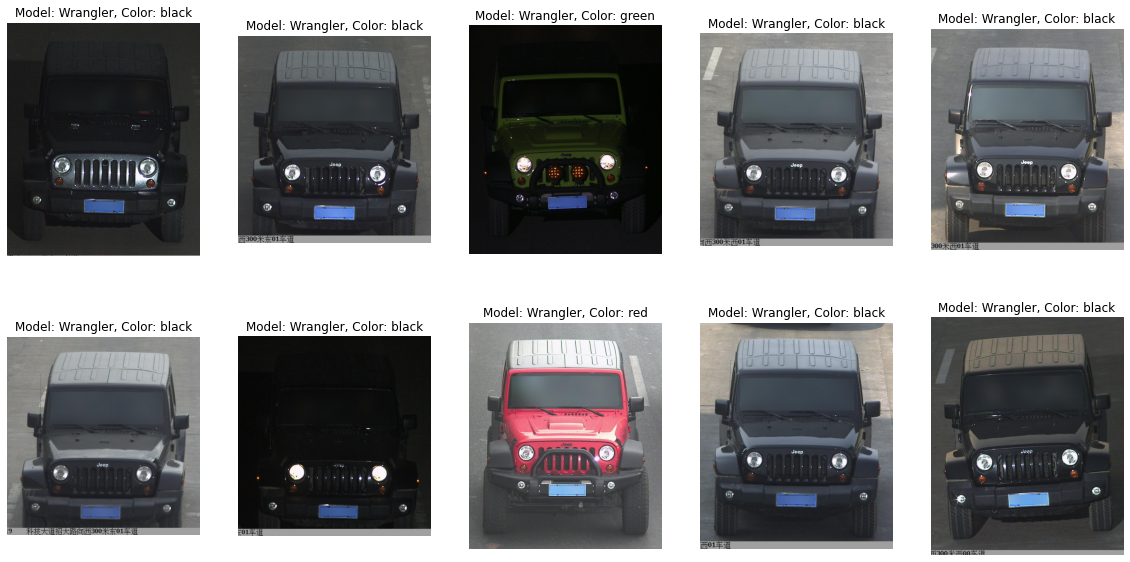

In [10]:
# Show an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_random_image(mark, model, dataframe):
  # Get random image of mark/model from dataframe
  random_image = random.sample(dataframe.query(f"Mark == '{mark}' and Model == '{model}'")[["Fullpath", "Color"]].values.tolist(), 10)
  # Read in the image and plot it using matplotlib
  plt.figure(figsize=(20, 10))
  for i in range(10):
    plt.subplot(2, 5, i+1)
    img = mpimg.imread(random_image[i][0])
    plt.title(f"Model: {model}, Color: {decoded_colors[str(random_image[i][1])]}")
    plt.axis("off");
    plt.imshow(img)

  return None

show_random_image("Jeep", "Wrangler", cars_data_all)  

In [11]:
import tensorflow as tf

# Function to split labels to be "Model" and "Color" as separete arrays
def split_outputs(generator):
    while True:
        data = next(generator)
        x = data[0]
        y = np.split(data[1], [281], axis=1) 
        yield x, y

# Not necessary to add augmentation to generators as already have good amount of data for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()


train_data = split_outputs(train_datagen.flow_from_dataframe(cars_data_all[cars_data_all["TrainFlag"]==True],
                                               x_col="Fullpath",
                                               y_col=cars_data_all.columns[7:].values,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="raw"))

# Get only part of data for runtime validation to speed up the training process
valid_data = split_outputs(test_datagen.flow_from_dataframe(cars_data_all[cars_data_all["TrainFlag"]==False][:640],
                                        x_col="Fullpath",
                                        y_col=cars_data_all.columns[7:].values,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode="raw"))

test_data = split_outputs(test_datagen.flow_from_dataframe(cars_data_all[cars_data_all["TrainFlag"]==False][640:],
                                        x_col="Fullpath",
                                        y_col=cars_data_all.columns[7:].values,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode="raw"))

Found 31148 validated image filenames.
Found 640 validated image filenames.
Found 12693 validated image filenames.


## Building baseline model
* it is based on EfficientNetB0 with all layers frozen except last 10
* we add our top layer

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

# Setup our base model with layers frozen
base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(224, 224, 3))

# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Create archintecture for Model training
input_images = tf.keras.Input(shape=(224, 224, 3), dtype='float32', name='images')
cars_model = tf.keras.models.Sequential()
cars_model.add(base_model)
cars_model.add(tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling"))
cars_model.add(tf.keras.layers.Dense(281, activation='softmax'))
cars_model._name = 'cars_model'
 
cars_output = cars_model(input_images)

# ReCreating TinyVGG architecture for color training
color_model = tf.keras.models.Sequential()
color_model.add(Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)))
color_model.add(Conv2D(10, 3, activation="relu"))
color_model.add(MaxPool2D(pool_size=2, padding="valid"))
color_model.add(Conv2D(10, 3, activation="relu"))
color_model.add(Conv2D(10, 3, activation="relu"))
color_model.add(MaxPool2D(pool_size=2, padding="valid"))
color_model.add(Flatten())
color_model.add(Dense(256, activation='relu'))
color_model.add(Dense(11, activation='softmax'))
color_model._name = 'color_model'
 
color_output = color_model(input_images)

# Model creation with EfficientNetB0 and TinyVGG layers
efficient_multi_model = tf.keras.Model(input_images, [cars_output, color_output])

# Compile the model
efficient_multi_model.compile(loss={'cars_model': 'categorical_crossentropy', 'color_model': 'categorical_crossentropy'},
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"]) # as we have balanced dataset, it is quite save to use ACCURACY metric

16719872/16705208 [==============================] - 0s 0us/step


In [19]:
efficient_multi_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 cars_model (Sequential)        (None, 281)          4409532     ['images[0][0]']                 
                                                                                                  
 color_model (Sequential)       (None, 11)           7197133     ['images[0][0]']                 
                                                                                                  
Total params: 11,606,665
Trainable params: 8,450,326
Non-trainable params: 3,156,339
_________

In [24]:
# Training the model
import math
with tf.device('/device:GPU:0'):
  history_efficient_multi = efficient_multi_model.fit(train_data,
                                                      epochs=1,
                                                      steps_per_epoch=math.ceil(len(cars_data_all[cars_data_all["TrainFlag"]==True])/32),
                                                      validation_data=valid_data,
                                                      validation_steps=20)

974/974 [==============================] - 5003s 5s/step - loss: 2.4846 - cars_model_loss: 1.1869 - color_model_loss: 1.2977 - cars_model_accuracy: 0.7729 - color_model_accuracy: 0.6954 - val_loss: 1.0723 - val_cars_model_loss: 0.2484 - val_color_model_loss: 0.8240 - val_cars_model_accuracy: 0.9469 - val_color_model_accuracy: 0.7531


In [29]:
# Evaluating a model
efficient_multi_evaluate = efficient_multi_model.evaluate(test_data, steps=math.ceil(len(cars_data_all[cars_data_all["TrainFlag"]==False][640:])/32))

397/397 [==============================] - 136s 344ms/step - loss: 0.9610 - cars_model_loss: 0.2702 - color_model_loss: 0.6908 - cars_model_accuracy: 0.9403 - color_model_accuracy: 0.7890


In [12]:
# Function to prepare image to predict/show
def load_and_prep_image(filename, img_shape=224, scale=True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

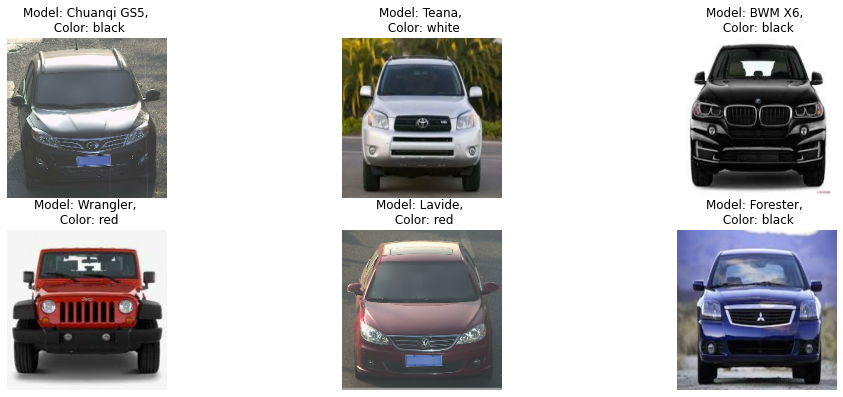

In [26]:
# Test different images
import matplotlib.pyplot as plt
import numpy as np
import glob


plt.figure(figsize=(17, 10))
examples = len(glob.glob("./test/*.jpg"))

for i, img in enumerate(glob.glob("./test/*.jpg")):
  plt.subplot(examples//2, examples//2, i+1)
  img = load_and_prep_image(img, scale=False) # no need to scale as Efficient base model already scaling the data
  pred_prob = efficient_multi_model.predict(tf.expand_dims(img, axis=0))
  x_model, x_color = pred_prob
  plt.title(f"Model: {decoded_model[str(x_model.argmax()+1)]}, \n Color: {decoded_colors[str(x_color.argmax())]}")
  plt.imshow(img/255.)
  plt.axis(False)


>⚠️**ToDos**
* Some conclusion: images above - mitsubisi is not "Forester" but "Galant", also it is toyota RAV4 but not Teana
* Add scaling layer for color part of the model
* Add augmentation and number of epochs
* Check different metrics like precision and recall to identify which classes are most misclassified